<a href="https://colab.research.google.com/github/realBagher/fundemental_Ai_algorithms/blob/main/kmeans_clustering/data_clustering_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm 


In [2]:
# Load the data from a CSV file
data = pd.read_csv('/content/data.csv')
data.columns = ['y','x']


In [3]:
X = data[['x', 'y']]
y = data.index

In [ ]:
import numpy as np
import pandas as pd

def kmeans_clustering(X, num_clusters, max_iterations=100):

    """
    assigns cluster to each data point

    Parameters:
        X (DataFrame): Input data features.
        num_clusters (Int): Number of the clusters.
        max_iterations (Int, optional): Number of maximum iterations.

    Returns:
        Labels (numpy array): Returns an array containing the data labels.  
    """


    # Convert input data to a NumPy array
    X = np.array(X)
    
    # Randomly initialize centroids
    centroids_indices = np.random.choice(range(len(X)), size=num_clusters, replace=False)
    centroids = X[centroids_indices]
    
    # Perform clustering
    for _ in range(max_iterations):
        # Calculate eucledian distances between data points and centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        
        # Assign data points to the nearest centroid
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on the mean of assigned data points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(num_clusters)])
        
        # Check convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels



num_clusters = 5
labels = kmeans_clustering(X, num_clusters)
data['team_number'] = labels
print(labels)


In [31]:

# Plot the data points with clusters
def plot_data(X, clusters=None):

    """
    Plots the data points with their corresponding classes or clusters.

    Parameters:
        X (DataFrame): Input data features.
        y (Series): Input data labels or classes.
        clusters (array-like, optional): Assigned clusters for the data points. Default is None.

    Returns:
        None
    """

    if clusters is None:
       print('error')
    else:
        plt.scatter(X[clusters == 0]['x'], X[clusters == 0]['y'], color='red', label='Cluster 0')
        plt.scatter(X[clusters == 1]['x'], X[clusters == 1]['y'], color='blue', label='Cluster 1')
        plt.scatter(X[clusters == 2]['x'], X[clusters == 2]['y'], color='green', label='Cluster 2')
        plt.scatter(X[clusters == 3]['x'], X[clusters == 3]['y'], color='orange', label='Cluster 3')
        plt.scatter(X[clusters == 4]['x'], X[clusters == 4]['y'], color='purple', label='Cluster 4')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()







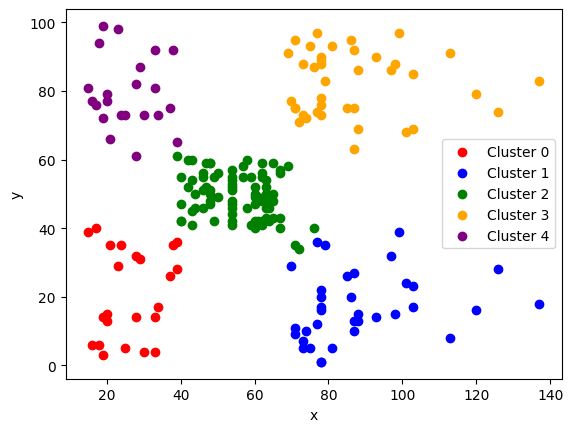

In [32]:
plot_data(X,  labels)

In [35]:
data

,y,x,team_number
0,39,15,0
1,81,15,4
2,6,16,0
3,77,16,4
4,40,17,0
...,...,...,...
195,79,120,3
196,28,126,1
197,74,126,3
198,18,137,1


In [36]:
data.to_csv('/content/result.csv')